In [1]:
from utils import *
from modules import *
import numpy as np 
import pandas as pd
from PIL import Image
import os
from os import listdir
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import rand_score,adjusted_rand_score
from time import time

import pickle as pkl

import warnings
warnings.filterwarnings("ignore")

# 1. Données USPS

In [18]:
data = pkl.load(open("data/usps.pkl",'rb'))

X_train = data["X_train"][:,:,np.newaxis]
Y_train = data["Y_train"]
X_test = data["X_test"][:,:,np.newaxis]
Y_test = data["Y_test"]

X_train = normalisation(X_train)
X_test = normalisation(X_test)

 12%|█████▏                                   | 10/80 [08:34<1:00:35, 51.93s/it]

Epoch 10/10 - Loss: 1.8408181412720421


 25%|██████████▊                                | 20/80 [17:15<52:12, 52.21s/it]

Epoch 20/10 - Loss: 1.7895550646884686


 38%|████████████████▏                          | 30/80 [25:54<43:01, 51.64s/it]

Epoch 30/10 - Loss: 1.7706401954026652


 50%|█████████████████████▌                     | 40/80 [34:30<34:32, 51.82s/it]

Epoch 40/10 - Loss: 1.77171757714535


 62%|██████████████████████████▉                | 50/80 [43:01<25:33, 51.13s/it]

Epoch 50/10 - Loss: 1.7563544342446045


 75%|████████████████████████████████▎          | 60/80 [51:39<17:13, 51.69s/it]

Epoch 60/10 - Loss: 1.7628741214032222


 88%|███████████████████████████████████▉     | 70/80 [1:00:56<09:13, 55.34s/it]

Epoch 70/10 - Loss: 1.7601354025903784


100%|█████████████████████████████████████████| 80/80 [1:09:57<00:00, 52.47s/it]

Epoch 80/10 - Loss: 1.732259397192751


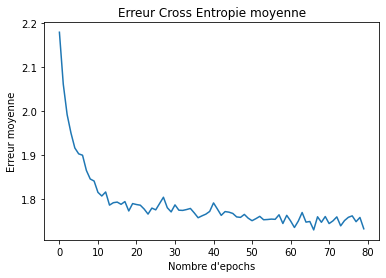

Accuracy  :  0.9627548563172259
CNN sur les données USPS
Optimisation finie au bout de  69  min


In [19]:
cnn_usps = Sequentiel([
    Conv1D(k_size=3, chan_in=1, chan_out=32, stride=1, init="xavier"),
    MaxPool1D(2, 2),
    Flatten(),
    ModuleLineaire(4064, 100, init="xavier"),
    ReLU(),
    ModuleLineaire(100, 10, init="xavier"),
    SoftMax()
])

opti = Optim(cnn_usps,CrossEntropieLoss(10), eps=1e-4)
tac = time()
opti.SGD(X_train, Y_train, taille_batch=10, nb_epochs=80, verbose=True)
tic = time()
opti.affichage(X_train,Y_train)

print("CNN sur les données USPS")
print("Optimisation finie au bout de ",int((tic-tac)/60)," min")

In [20]:
print("CNN sur les données USPS")
print("Accuracy sur le train",opti.getNetwork().accuracy(X_train,Y_train))
print("Accuracy sur le test",opti.getNetwork().accuracy(X_test,Y_test))

CNN sur les données USPS
Accuracy sur le train 0.9627548563172259
Accuracy sur le test 0.942000651678071


In [27]:
### Pour avoir une image du network 

#net_to_graph(opti.getNetwork(), net_name="networks_images/network_CNN_USPS", horizontal=True)

In [26]:
X_train = X_train.reshape(X_train.shape[0],-1)
nb_classes = 10

Y_pred = opti.getNetwork().predict(X_train[:,:,np.newaxis],nb_classes)

kmeans = KMeans(n_clusters=nb_classes, random_state=0, max_iter=1000).fit(X_train)
yhat = kmeans.labels_

y_cluster_pred = np.zeros(len(X_train))
indices = np.arange(len(X_train))

for cluster in range(nb_classes):

    vals, counts = np.unique(Y_train[yhat == cluster], return_counts=True)
    val_maj = vals[np.argmax(counts)]

    y_cluster_pred[indices[yhat == cluster]] = val_maj

    
y_cluster_pred = np.array(y_cluster_pred.astype("int"))


print("TRAIN\n")
print("Purete du clustering de Kmeans sur les labels USPS : ",cluster_purity(Y_train,y_cluster_pred))
print("Purete du clustering de Kmeans sur les labels prédits par le CNN : ",cluster_purity(Y_pred,y_cluster_pred))

print()

print("Rand_score du clustering de Kmeans sur les labels USPS : ",rand_score(Y_train,y_cluster_pred))
print("Rand_score du clustering de Kmeans sur les labels prédits par le CNN : ",rand_score(Y_pred,y_cluster_pred))

print("--------------------------------------------")


X_test = X_test.reshape(X_test.shape[0],-1)

Y_pred = opti.getNetwork().predict(X_test[:,:,np.newaxis],nb_classes)

kmeans = KMeans(n_clusters=10, random_state=0, max_iter=1000).fit(X_test)
yhat = kmeans.labels_

y_cluster_pred = np.zeros(len(X_test))
indices = np.arange(len(X_test))

for cluster in range(nb_classes):

    vals, counts = np.unique(Y_test[yhat == cluster], return_counts=True)
    val_maj = vals[np.argmax(counts)]

    y_cluster_pred[indices[yhat == cluster]] = val_maj

y_cluster_pred = np.array(y_cluster_pred.astype("int"))

print("\nTEST\n")
print("Purete du clustering de Kmeans sur les labels USPS : ",cluster_purity(Y_test,y_cluster_pred))
print("Purete du clustering de Kmeans sur les labels prédits par le CNN: ",cluster_purity(y_cluster_pred,Y_pred,nb_classes))

print()

print("Rand_score du clustering de Kmeans sur les labels USPS : ",rand_score(Y_test,y_cluster_pred))
print("Rand_score du clustering de Kmeans sur les labels prédits par le CNN : ",rand_score(y_cluster_pred,Y_pred))


TRAIN

Purete du clustering de Kmeans sur les labels USPS :  0.7389629153957297
Purete du clustering de Kmeans sur les labels prédits par le CNN :  0.7447423342430567

Rand_score du clustering de Kmeans sur les labels USPS :  0.921614801713204
Rand_score du clustering de Kmeans sur les labels prédits par le CNN :  0.9226282003098812
--------------------------------------------

TEST

Purete du clustering de Kmeans sur les labels USPS :  0.7279244053437601
Purete du clustering de Kmeans sur les labels prédits par le CNN:  0.783642880417074

Rand_score du clustering de Kmeans sur les labels USPS :  0.9184731191292154
Rand_score du clustering de Kmeans sur les labels prédits par le CNN :  0.9212512473857472


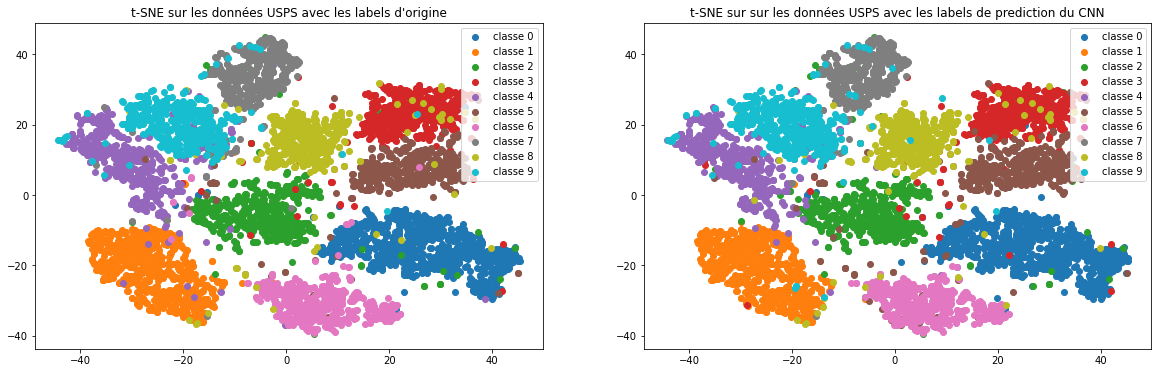

In [30]:
yhat = opti.getNetwork().predict(X_train[:,:,np.newaxis],nb_classes)

tsne = TSNE(n_components=2, init='pca',n_iter=500, verbose=0)
X_train_tsne = tsne.fit_transform(X_train)

colors = {i: plt.cm.tab10(i) for i in range(10)}

fig = plt.figure(figsize=(20,6))

plt.subplot(121)

for c in range(10):
    plt.scatter(X_train_tsne[:,0][Y_train == c],X_train_tsne[:,1][Y_train == c],color=colors[c],label=f"classe {c}")
    
plt.title("t-SNE sur les données USPS avec les labels d'origine")
plt.legend()
plt.subplot(122)

y_cluster_pred = np.zeros(len(X_train))
indices = np.arange(len(X_train))

for cluster in range(10):

    vals, counts = np.unique(Y_train[yhat == cluster], return_counts=True)
    val_maj = vals[np.argmax(counts)]
    
    y_cluster_pred[indices[yhat == cluster]] = val_maj
    
    
colors = {i: plt.cm.tab10(i) for i in range(10)}
for c in range(10):
    plt.scatter(X_train_tsne[:,0][y_cluster_pred == c],X_train_tsne[:,1][y_cluster_pred == c],color=colors[c],label=f"classe {c}")
    
plt.title("t-SNE sur sur les données USPS avec les labels de prediction du CNN")
plt.legend()
    
plt.show()